In [5]:
from src.sentinel_api import get_sentinel_api
from src.constant import GEOJSON_PATH, DOWNLOADED_DATA_PATH, REMOVE_ZIPS
import os

# get api 
api = get_sentinel_api()

In [6]:
# search by polygon, time, and Hub query keywords
products_query = api.query(
                    limit = 1,
                    filename = 'S2A_*',
                    producttype = 'S2MSI2A')

os.makedirs(DOWNLOADED_DATA_PATH, exist_ok = True) 
products = api.download_all(products_query, DOWNLOADED_DATA_PATH)
print(products)

Downloading: 100%|██████████| 1.16G/1.16G [01:39<00:00, 11.6MB/s]
MD5 checksumming: 100%|██████████| 1.16G/1.16G [00:35<00:00, 32.5MB/s](OrderedDict([('875f4bd1-8059-4cc9-b5ae-c92d2734ecb1', {'id': '875f4bd1-8059-4cc9-b5ae-c92d2734ecb1', 'title': 'S2A_MSIL2A_20200531T051701_N0214_R062_T45UUQ_20200531T100112', 'size': 1159686880, 'md5': '98E91533821721E16B4452AE39C3E6AA', 'date': datetime.datetime(2020, 5, 31, 5, 17, 1, 24000), 'footprint': 'POLYGON((84.23863153532785 49.480063967524345,84.26891901918259 49.5592308723076,84.29245609010424 49.620665083656064,85.75053740496534 49.64598096654525,85.7751310377905 48.6585189163826,84.2853710517972 48.63303181535822,84.23863153532785 49.480063967524345))', 'url': "https://scihub.copernicus.eu/dhus/odata/v1/Products('875f4bd1-8059-4cc9-b5ae-c92d2734ecb1')/$value", 'Online': True, 'Creation Date': datetime.datetime(2020, 5, 31, 17, 7, 1, 495000), 'Ingestion Date': datetime.datetime(2020, 5, 31, 17, 3, 6, 869000), 'path': './src/data/S2A_MSIL2A_

In [7]:
file_titles = []
zip_files = []

for product in products:
    for product_id in product:
        file_titles.append(product[product_id]['title'])
        zip_files.append(product[product_id]['path'])

        import zipfile
        archive = zipfile.ZipFile(product[product_id]['path'], 'r')
        archive.extractall(path=DOWNLOADED_DATA_PATH)

for zip_file in zip_files:
    if REMOVE_ZIPS:
        os.remove(zip_file)     

T45UUQ_20200531T051701_AOT_10m.jp2


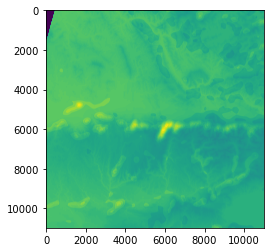

T45UUQ_20200531T051701_B02_10m.jp2


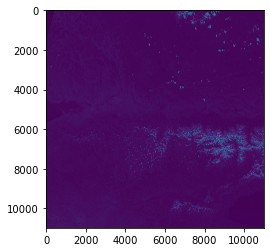

T45UUQ_20200531T051701_B03_10m.jp2


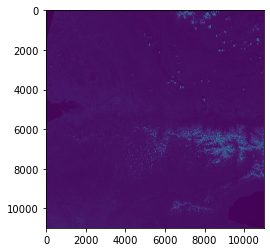

T45UUQ_20200531T051701_B04_10m.jp2


MemoryError: Unable to allocate 460. MiB for an array with shape (10980, 10980) and data type float32

In [9]:
import rasterio
import rasterio.features
import rasterio.warp
import matplotlib.pyplot as plt

for file_title in file_titles:
    granule_path = os.path.join(DOWNLOADED_DATA_PATH, '{}.SAFE'.format(file_title), 'GRANULE')
    img_data_path = os.path.join(granule_path, os.listdir(granule_path)[0], 'IMG_DATA')
    for sub_folder_name in sorted(os.listdir(img_data_path)):
        ímg_data_sub_folder_path = os.path.join(img_data_path, sub_folder_name)
        for jp2_file_name in sorted(os.listdir(ímg_data_sub_folder_path)):
            print(jp2_file_name)
            jp2_file_path =  os.path.join(ímg_data_sub_folder_path, jp2_file_name)   

            with rasterio.open(jp2_file_path, "r", driver='JP2OpenJPEG') as dataset:
                # Read the dataset's data
                data = dataset.read(1)

                # Visualise the dataset's data
                fig, ax = plt.subplots()
                img = ax.imshow(data.real)
                plt.show()